<a href="https://colab.research.google.com/github/Jaksta1/Uczenie_Maszynowe_2025/blob/main/Praca_domowa_2_Jakub_Kownacki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import random


-------------------------------
# 1. Wygenerowanie zbioru danych "mouse"
-------------------------------

In [21]:
# 300 punktów z N([0,0], [[0.16,0],[0,0.16]])
data1 = np.random.multivariate_normal([0, 0], [[0.16, 0.0], [0.0, 0.16]], 300)
# 100 punktów z N([0.8,0.8], [[0.04,0],[0,0.04]])
data2 = np.random.multivariate_normal([0.8, 0.8], [[0.04, 0.0], [0.0, 0.04]], 100)
# 100 punktów z N([-0.8,0.8], [[0.04,0],[0,0.04]])
data3 = np.random.multivariate_normal([-0.8, 0.8], [[0.04, 0.0], [0.0, 0.04]], 100)
# Połączenie wszystkich danych
X = np.vstack([data1, data2, data3])
# Oryginalne etykiety (przyjmujemy, że:
# pierwsze 300 punktów -> klaster 0, kolejne 100 -> klaster 1, ostatnie 100 -> klaster 2)
true_labels = np.array([0]*300 + [1]*100 + [2]*100)

-------------------------------
# 2. Dopasowanie metody EM w modelu GMM do danych "mouse"
-------------------------------

In [22]:
# Metoda EM w modelu GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(X)


GaussianMixture(n_components=3, random_state=0)

-------------------------------
# 3. Przygotowanie siatki punktów do wizualizacji granic decyzyjnych
-------------------------------

In [23]:
# Określenie zakresów
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predykcja etykiet na siatce
gmm_grid = gmm.predict(grid)

-------------------------------
# 4. Wizualizacja wyników
-------------------------------

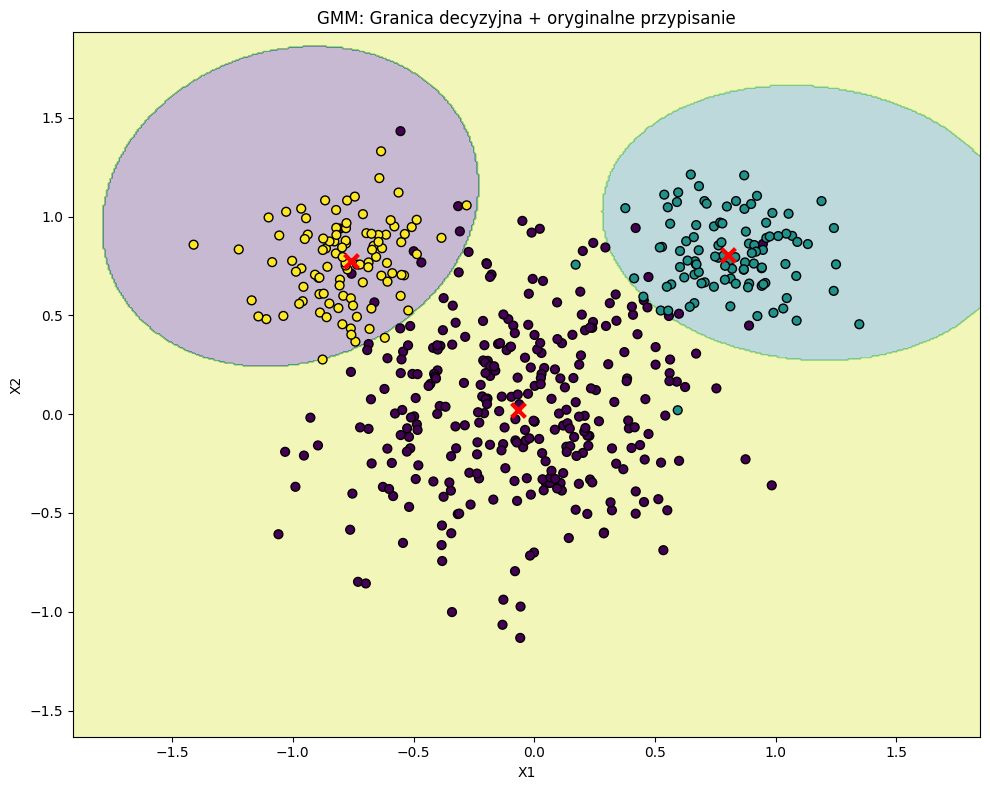

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Wykres dla GMM
ax.contourf(xx, yy, gmm_grid.reshape(xx.shape), alpha=0.3, cmap='viridis')
# Nakładamy oryginalne przypisanie punktów (oryginalne etykiety)
scatter = ax.scatter(X[:, 0], X[:, 1], c=true_labels, edgecolor='k', cmap='viridis', s=40)
# Opcjonalnie: zaznaczamy środki klastrów (średnie z modelu GMM)
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', c='red', s=100, linewidths=3)
ax.set_title('GMM: Granica decyzyjna + oryginalne przypisanie')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

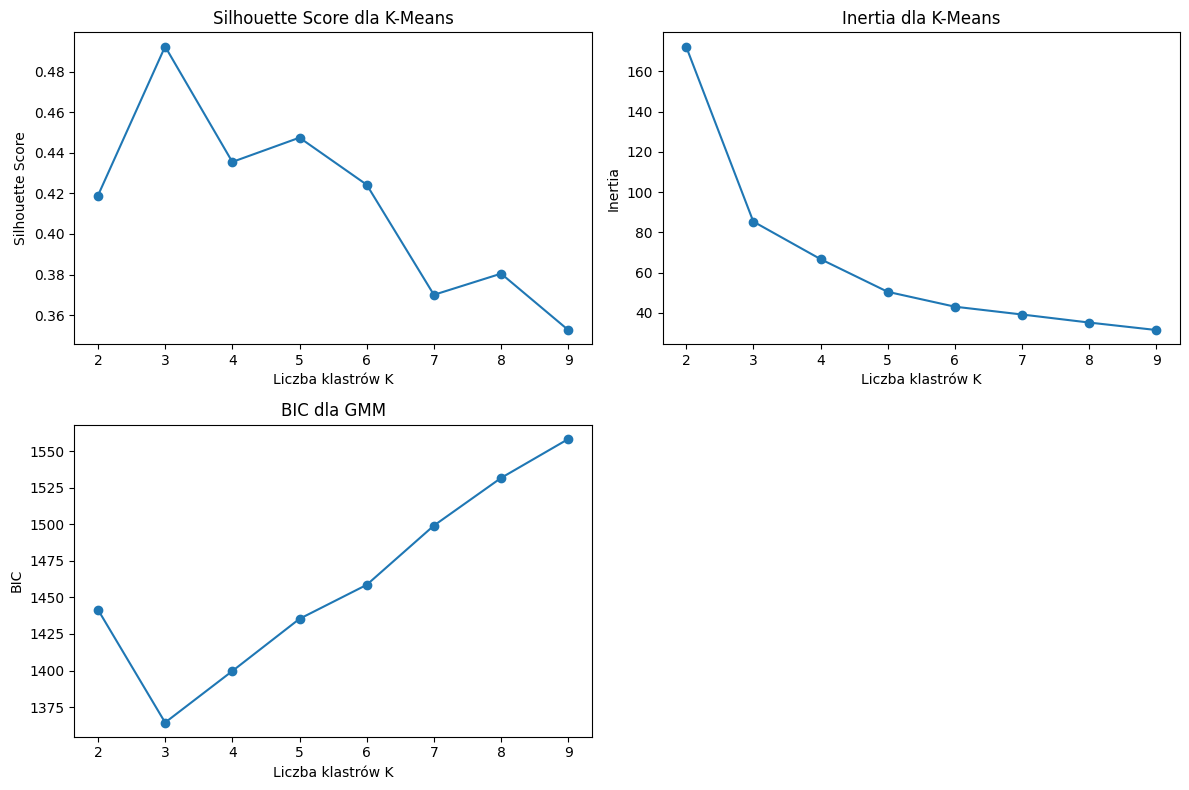

In [25]:
from sklearn.metrics import silhouette_score
# Listy do przechowywania wyników
silhouette_scores = []
inertia_values = []
bic_values = []
K_range = range(2, 10)

for K in K_range:
    # Dopasowanie K-Means
    kmeans = KMeans(n_clusters=K).fit(X)
    labels_kmeans = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels_kmeans))
    inertia_values.append(kmeans.inertia_)

    # Dopasowanie GMM
    gmm = GaussianMixture(n_components=K).fit(X)
    bic_values.append(gmm.bic(X))

# Wykresy
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score dla K-Means')
plt.xlabel('Liczba klastrów K')
plt.ylabel('Silhouette Score')

plt.subplot(2, 2, 2)
plt.plot(K_range, inertia_values, marker='o')
plt.title('Inertia dla K-Means')
plt.xlabel('Liczba klastrów K')
plt.ylabel('Inertia')

plt.subplot(2, 2, 3)
plt.plot(K_range, bic_values, marker='o')
plt.title('BIC dla GMM')
plt.xlabel('Liczba klastrów K')
plt.ylabel('BIC')

plt.tight_layout()
plt.show()